In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1 - Image Classification

In the heart of Africa, the majestic rhinoceroses and elephants are under constant threat from poachers seeking to profit from their ivory horns and tusks. To combat this crisis and protect these magnificent creatures, I have developed an image classification system. This system will use advanced AI algorithms to detect and identify rhinos and elephants in real-time, allowing for quicker response and protection against poaching activities.

Objective:
The primary objective of this project is to create a robust image classification system capable of identifying rhinoceroses and elephants from photographs and video footage. By accurately recognizing these animals in their natural habitat, wildlife conservationists and authorities can respond swiftly to any potential threats, such as poachers or natural disasters, and implement necessary protective measures.

In [ ]:
# Import the necessary files
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image as image_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
smiling_directory = "/content/drive/MyDrive/elephant"
not_smiling_directory = "/content/drive/MyDrive/rhino"

directory_path = "/content/drive/MyDrive/IT3381 ADL/Assignment/"
# Function to count files in a directory
def count_files_in_directory(directory_path):
    # Use os.listdir() to get a list of all files and directories in the specified directory
    all_files = os.listdir(directory_path)

    # Filter the list to include only files (not directories)
    files = [f for f in all_files if os.path.isfile(os.path.join(directory_path, f))]

    # Get the count of files
    num_files = len(files)

    return num_files

# Count files in the smiling directory
num_files_in_smiling = count_files_in_directory(smiling_directory)

# Count files in the not-smiling directory
num_files_in_not_smiling = count_files_in_directory(not_smiling_directory)

# Print the counts
print(f"Number of files in the elephant directory: {num_files_in_smiling}")
print(f"Number of files in the rhino directory: {num_files_in_not_smiling}")

Number of files in the elephant directory: 376
Number of files in the rhino directory: 376


There are 376 images in each directory.

# Preprocess the image for CNN model.

Convert the images to pixel format (224,224,3).

In [ ]:
# Run this once with the image directories to convert them to 784 pixels.

# Define input directories
smiling_directory = "/content/drive/MyDrive/elephant"
not_smiling_directory = "/content/drive/MyDrive/rhino"

# Create empty lists to store image data and labels
data = []
labels = []

# Function to load and preprocess images from a directory
def load_and_preprocess_images(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Construct the full path for the image
            input_path = os.path.join(directory, filename)

            # Open the image
            image = image_utils.load_img(input_path, color_mode="rgb", target_size=(224, 224))
            image = image_utils.img_to_array(image)

            # Append the image data and label to the lists
            data.append(image)
            labels.append(label)

# Load and preprocess smiling images (label 1)
load_and_preprocess_images(smiling_directory, label=1)

# Load and preprocess not-smiling images (label 0)
load_and_preprocess_images(not_smiling_directory, label=0)

# Convert the lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into train (70%) and temp (30%) sets
x_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)

# Split the temp set into test (50%) and validation (50%) sets
x_test, x_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((525, 224, 224, 3), (113, 224, 224, 3), (112, 224, 224, 3))

# Creation of own CNN Model

In [ ]:
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

cnn_model = Sequential()

# Convolutional Layer 1
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# Comment: This layer extracts 64 different features using a 3x3 kernel, applying ReLU activation.
# Input images are 224x224 pixels with 3 color channels (RGB).

# Batch Normalization
cnn_model.add(BatchNormalization())
# Comment: Batch normalization is used to normalize the activations, improving model convergence and generalization.

# Max-Pooling Layer 1
cnn_model.add(MaxPool2D((2, 2), strides=2))
# Comment: Max-pooling reduces spatial dimensions, providing translation invariance.

# Convolutional Layer 2
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
# Comment: Another convolutional layer with 64 filters and ReLU activation is added.

# Dropout Layer 1
cnn_model.add(Dropout(0.3))
# Comment: Dropout with a rate of 0.3 is applied to prevent overfitting by randomly deactivating neurons during training.

# Max-Pooling Layer 2
cnn_model.add(MaxPool2D((2, 2), strides=2))
# Comment: Another max-pooling layer reduces spatial dimensions.

# Dense Layer 1
cnn_model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
# Comment: A dense layer with 64 units and L2 regularization is added for feature aggregation.
# L2 regularization helps prevent overfitting by adding a penalty to large weights.

# Dropout Layer 2
cnn_model.add(Dropout(0.4))
# Comment: Another dropout layer with a higher rate of 0.4 is used for additional regularization.

# Flatten Layer
cnn_model.add(Flatten())
# Comment: Flatten layer converts the 2D feature maps into a 1D vector for input to the fully connected layers.

# Dense Layer 2
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
# Comment: A dense layer with 128 units and ReLU activation is added for further feature extraction.
# L2 regularization is maintained for regularization.

# Output Layer
cnn_model.add(Dense(1, activation='sigmoid'))
# Comment: The final output layer with a single neuron and sigmoid activation is used for binary classification.
# Sigmoid activation is suitable for binary classification problems like identifying elephants or rhinos.

# Overall, these tuning techniques like batch normalization, dropout layers, and L2 regularization are applied
# to prevent overfitting and improve the model's generalization ability, resulting in better accuracy and robustness.


cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 dropout_2 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)      

Epoch 1/20
16/16 [==============================] - 13s 743ms/step - loss: 3.7383 - accuracy: 0.5295 - val_loss: 6.2714 - val_accuracy: 0.4602
Epoch 2/20
16/16 [==============================] - 7s 434ms/step - loss: 1.2056 - accuracy: 0.5448 - val_loss: 2.1138 - val_accuracy: 0.4602
Epoch 3/20
16/16 [==============================] - 13s 820ms/step - loss: 0.9810 - accuracy: 0.6305 - val_loss: 1.0160 - val_accuracy: 0.5398
Epoch 4/20
16/16 [==============================] - 7s 433ms/step - loss: 0.9377 - accuracy: 0.6743 - val_loss: 1.1554 - val_accuracy: 0.6018
Epoch 5/20
16/16 [==============================] - 9s 547ms/step - loss: 0.9182 - accuracy: 0.6629 - val_loss: 0.9181 - val_accuracy: 0.6991
Epoch 6/20
16/16 [==============================] - 7s 436ms/step - loss: 0.9354 - accuracy: 0.6781 - val_loss: 0.8798 - val_accuracy: 0.6991
Epoch 7/20
16/16 [==============================] - 9s 519ms/step - loss: 0.9052 - accuracy: 0.6743 - val_loss: 0.8615 - val_accuracy: 0.7168
Epoc

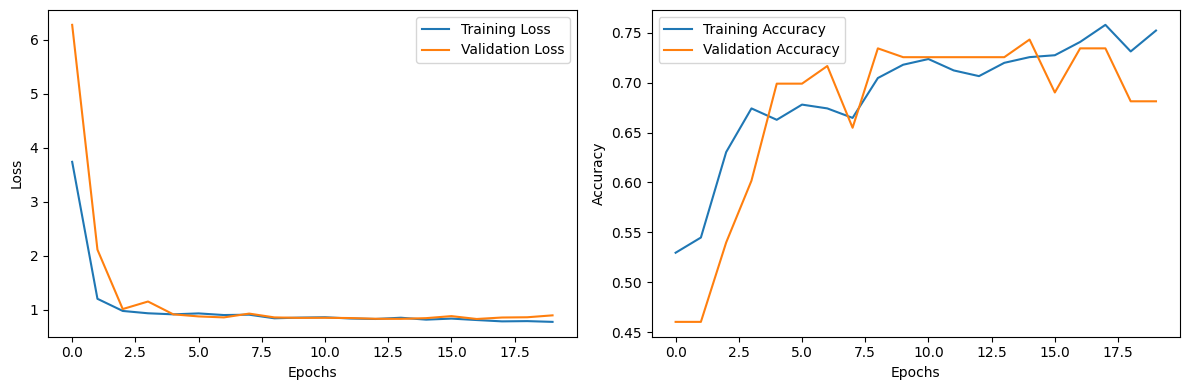

In [ ]:
# Lower learning rate to allow the model to move slower to finding the optimal weights for prediction
optimizer = Adam(learning_rate=0.0001)

# Compile the model
cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Since the dataset is small, add some data augmentation for better learning.
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

# Let datagen see the training data
datagen.fit(x_train)

# Adjust batch size for more/less computations
batch_size = 16
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

history = cnn_model.fit(img_iter,
          epochs=20, verbose=1,
          steps_per_epoch=len(x_train)/batch_size,
          validation_data=(x_val, y_val))

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The model is doing quite well in predicting whether an image is a rhino or elephant.

The training and validation loss from 2.5 epochs and above flatlines around less than 1. This shows that the model isn't over or under-fitting since the loss is roughly similar.

The training and validation accuracies are also increasing to more than 65% from 5 epochs onward.

(Lots of training was done prior to getting this result!!)

Validation of CNN trained model

In [ ]:
# Use the trained model to make predictions on the validation data
predictions = cnn_model.predict(x_test)

# Apply a threshold (e.g., 0.5) to determine the predicted class labels
predicted_labels = (predictions > 0.5).astype(int)

# Convert true labels to integers (assuming they are in one-hot encoded form)
true_labels = y_test

# Ensure both predicted_labels and true_labels are 1D arrays
predicted_labels = predicted_labels.squeeze()
true_labels = true_labels.squeeze()

# Calculate accuracy
accuracy = np.mean(np.equal(predicted_labels, true_labels))

# Print the accuracy
print('Validation Accuracy:', accuracy)

4/4 [==============================] - 1s 129ms/step
Validation Accuracy: 0.75


Using the test data to evaluate the model, the model is 75% accurate in predicting whether an image is a rhino or elephant, which is quite good.

# Transfer Learning with VGG-16

VGG-16 has been trained on a subset of the ImageNet dataset, which consists of a collection of over 14 million images belonging to 22,000 categories including animals.

Rather than just training my own model, let's see how pre-trained models work on my dataset. I will also evaluate which model performs better - pretrained or own trained model.

Since I'm working with a relatively small image dataset of 376 images in each class, I will use VGG-16 as a feature extractor. I will freeze the weights in the Feature Extractor (Convolutional base) and add my own classifier head.

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

# Preprocess image to align with original ImageNet dataset
x_train_processed = [preprocess_input(img) for img in x_train]
x_valid_processed = [preprocess_input(img) for img in x_val]

# Convert the processed lists to NumPy arrays
x_train_processed = np.array(x_train_processed)
x_valid_processed = np.array(x_valid_processed)

# Check the shape of the processed arrays
print('Processed training data shape: ', x_train_processed.shape)
print('Processed validation data shape: ', x_valid_processed.shape)

Processed training data shape:  (525, 224, 224, 3)
Processed validation data shape:  (113, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import VGG16, MobileNet

base_model = VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

# Freeze base layer
base_model.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

num_classes = 1

# Define the input layer for the model, specifying the shape of the input images.
inputs = keras.Input(shape=(224, 224, 3))

# Connect the base model (VGG16) to the input layer.
x = base_model(inputs)

# Apply Batch Normalization to the output of the base model.
x = keras.layers.BatchNormalization()(x)
# Comment: Batch normalization is applied to normalize the activations from the base model,
# which can help stabilize and accelerate training.

# Flatten the output from the base model.
x = keras.layers.Flatten()(x)
# Comment: The Flatten layer is used to convert the 2D output from the base model into a 1D vector
# for input to the dense layers of the classification head.

# Define the output layer of the model, which is a single neuron with sigmoid activation for binary classification.
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
# Comment: This output layer produces a single value between 0 and 1, indicating the probability
# of the input image belonging to a particular class (e.g., elephant or rhino).

# Create the final transfer learning model, connecting the input and output layers.
tl_model = keras.Model(inputs, outputs)

# Compile the model
tl_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

datagen.fit(x_train_processed)
batch_size = 16
img_iter = datagen.flow(x_train_processed, y_train, batch_size=batch_size)

# Train the model
history = tl_model.fit(img_iter,
                    epochs=10,
                    verbose=1,
                    steps_per_epoch=len(x_train) / batch_size,
                    validation_data=(x_valid_processed, y_val))

Epoch 1/10
32/32 [==============================] - 10s 270ms/step - loss: 1.6712 - accuracy: 0.8514 - val_loss: 0.5152 - val_accuracy: 0.9558
Epoch 2/10
32/32 [==============================] - 8s 227ms/step - loss: 0.6927 - accuracy: 0.9390 - val_loss: 0.6046 - val_accuracy: 0.9469
Epoch 3/10
32/32 [==============================] - 9s 271ms/step - loss: 0.3267 - accuracy: 0.9638 - val_loss: 0.5863 - val_accuracy: 0.9558
Epoch 4/10
32/32 [==============================] - 7s 214ms/step - loss: 0.5052 - accuracy: 0.9695 - val_loss: 0.4485 - val_accuracy: 0.9558
Epoch 5/10
32/32 [==============================] - 8s 239ms/step - loss: 0.4359 - accuracy: 0.9676 - val_loss: 0.5385 - val_accuracy: 0.9558
Epoch 6/10
32/32 [==============================] - 10s 294ms/step - loss: 0.5826 - accuracy: 0.9581 - val_loss: 0.1769 - val_accuracy: 0.9646
Epoch 7/10
32/32 [==============================] - 9s 262ms/step - loss: 0.1482 - accuracy: 0.9867 - val_loss: 0.0893 - val_accuracy: 0.9823
Epoc

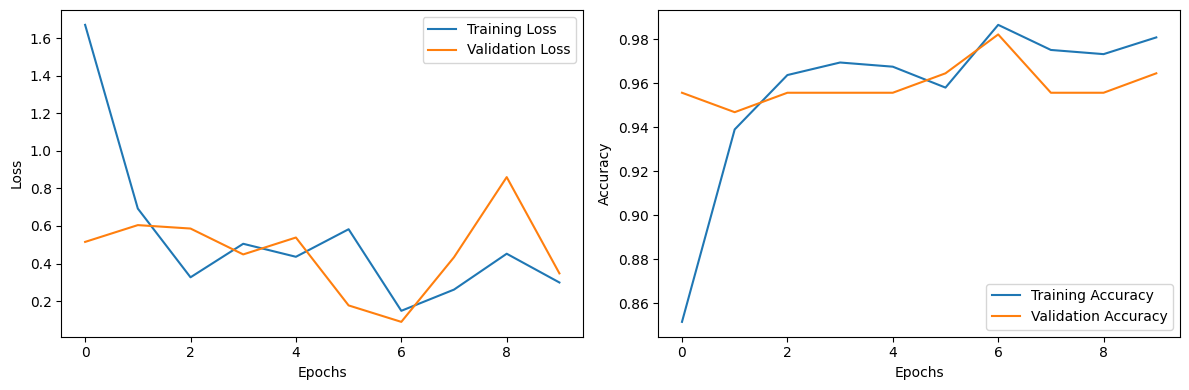

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Looking at the pretrained model's loss and accuracy, it definitely performs better than my manually tuned model. This could be due to the fact that the model was already trained on a large number of animal data that could potentially include rhinos and elephants.

Additionally, the model does not show any signs of overfitting as the loss and accuracy for training and validation are roughly similar.

In [ ]:
# Use the trained model to make predictions on the testing data
predictions = tl_model.predict(x_test)

# Apply a threshold (e.g., 0.5) to determine the predicted class labels
predicted_labels = (predictions > 0.5).astype(int)

# Convert true labels to integers (assuming they are in one-hot encoded form)
true_labels = y_test

# Ensure both predicted_labels and true_labels are 1D arrays
predicted_labels = predicted_labels.squeeze()
true_labels = true_labels.squeeze()

# Calculate accuracy
accuracy = np.mean(np.equal(predicted_labels, true_labels))

# Print the accuracy
print('Validation Accuracy:', accuracy)

4/4 [==============================] - 1s 134ms/step
Validation Accuracy: 0.8839285714285714


Looking at the accuracy of the model when predicting the test data, we can see that it performs better than my original trained model, which only has an accuracy of 75%.

Therefore, pretrained model is better at classification of the rhino/elephant.